<a href="https://colab.research.google.com/github/silviapihu/magistritoo/blob/master/classificationGDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Erinevate visualiseerimis-, kalibreerimis-, võrdlusmeetodite katsetused
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/
https://scikit-learn.org/stable/auto_examples/calibration/plot_compare_calibration.html#sphx-glr-auto-examples-calibration-plot-compare-calibration-py
https://stats.stackexchange.com/questions/336404/feature-importance-for-breast-cancer-random-forests-vs-logistic-regression
https://www.dummies.com/programming/big-data/data-science/data-science-how-to-create-interactions-between-variables-with-python/


In [2]:

from google.colab import files
uploaded = files.upload()

Saving koos.csv to koos.csv


In [3]:
import pandas as pd
import numpy as np



In [4]:
import io
koos = pd.read_csv(io.BytesIO(uploaded['koos.csv']))

In [5]:
gdm = koos[['DM_sugul','Vanus', 'sugu', 'KMI', 'suur_laps_varem', 'paastusuhkur', 'polyhydramnion', 'PCOS', 'GDM']]

In [6]:
gdm=gdm.dropna()
gdm.describe()

,DM_sugul,Vanus,sugu,KMI,suur_laps_varem,paastusuhkur,polyhydramnion,PCOS,GDM
count,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000,4941.000000
mean,0.093908,29.302545,1.481886,23.564588,0.021656,0.154422,0.019834,0.011739,0.087027
std,0.291730,5.323188,0.499722,4.547652,0.145571,0.361390,0.139444,0.107718,0.281903
min,0.000000,14.000000,1.000000,14.500000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.963039,1.000000,20.478267,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,1.000000,22.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,33.000000,2.000000,25.559329,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,47.000000,2.000000,53.200000,1.000000,1.000000,1.000000,1.000000,1.000000


tasakaalustamata andmed. kasutan positiivse ms väärtusega ridade paljundamist ja negatiivsete vähendamist

In [7]:
from collections import Counter
from imblearn.combine import SMOTEENN
y = gdm.GDM
X = gdm.drop('GDM', 1)
# summarize class distribution
print(Counter(y))
# define sampling strategy
sample = SMOTEENN(sampling_strategy=0.5, random_state=1)
# fit and apply the transform
X_over, y_over = sample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 4511, 1: 430})
Counter({0: 3539, 1: 1546})


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [8]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X_over)

In [9]:
X_scaled.shape

(5085, 8)

Mudelite võrdlus

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.814239 (0.142908)
LDA: 0.828610 (0.129226)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.822963 (0.126107)
DT: 0.610059 (0.338596)
GNB: 0.800514 (0.105006)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.859300 (0.118749)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.731730 (0.290795)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

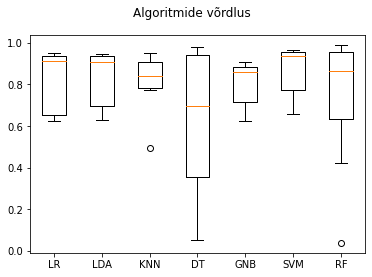

In [10]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
seed = 1
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_scaled, y_over, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algoritmide võrdlus')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

plt.savefig('mudelid.png')
files.download('mudelid.png')
plt.show()

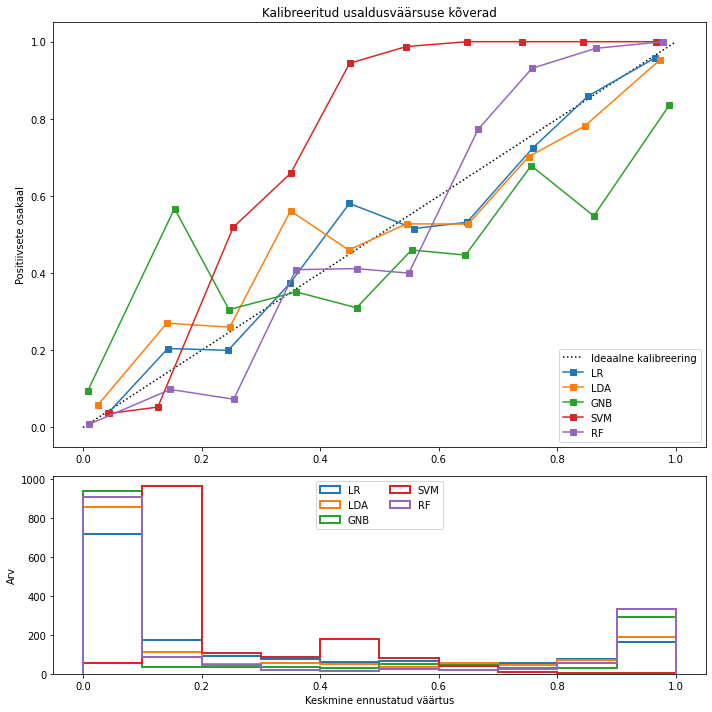

In [11]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_over,test_size=0.3, random_state=1)
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Create classifiers
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
gnb = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Ideaalne kalibreering")
for clf, name in [(lr, 'LR'),
                  (lda, 'LDA'),
                  (gnb, 'GNB'),
                  (svc, 'SVM'),
                  (rfc, 'RF')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Positiivsete osakaal")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Kalibreeritud usaldusväärsuse kõverad')

ax2.set_xlabel("Keskmine ennustatud väärtus")
ax2.set_ylabel("Arv")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
logi=LogisticRegression()
params = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_lr = GridSearchCV(estimator = logi,
                        param_grid = params,
                        scoring = 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_lr.fit(X_train, y_train)
print(grid_lr.score(X_test, y_test))
print(grid_lr.best_estimator_)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 554 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 851 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  5.5min finished


0.9655021807571684
LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Võrkotsing

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import *
forest = RandomForestClassifier(random_state = 1)
params = { 'n_estimators' : [100, 300, 500, 800, 1200],
'max_depth' : [5, 8, 15, 25, 30],
'min_samples_split' : [2, 5, 10, 20],
'min_samples_leaf' : [1, 2, 4, 7]}
grid_rf=GridSearchCV(estimator = forest,
                        param_grid = params,
                        scoring = 'roc_auc', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)

grid_rf.fit(X_train, y_train)
print(grid_rf.score(X_test, y_test))
print(grid_rf.best_estimator_)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   42.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 13.8min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 22.9min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 34.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 37.9min finished


0.9917521478992141
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)


Tunnuste olulisus

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

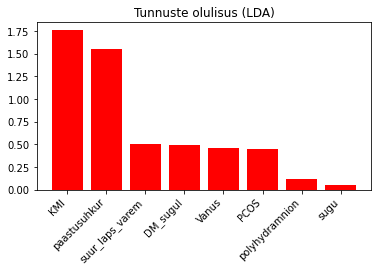

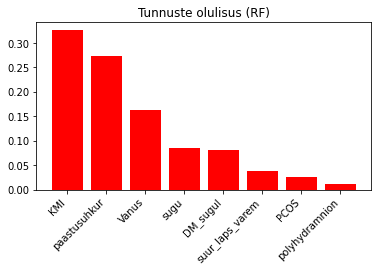

In [17]:

clf = LinearDiscriminantAnalysis()
clf.fit(X_scaled, y_over)
coefs = np.abs(clf.coef_[0])
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Tunnuste olulisus (LDA)")
plt.bar(range(8), coefs[indices[:8]],
       color="r", align="center")
plt.xticks(range(8), gdm.columns[indices[:8]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

clf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
clf.fit(X_scaled, y_over)
coefs = clf.feature_importances_
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Tunnuste olulisus (RF)")
plt.bar(range(8), coefs[indices[:8]],
       color="r", align="center")
plt.xticks(range(8), gdm.columns[indices[:8]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); 
plt.savefig('tunnused.png')
files.download('tunnused.png')
plt.show()

Kriteeriumide arvutus

In [22]:
!pip install pycm
from pycm import *

model=LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
model.fit(X_train, y_train)
cm = ConfusionMatrix(y_test, model.predict(X_test))
print(cm)

Predict    0          1          
Actual
0          1030       29         

1          81         386        





Overall Statistics : 

95% CI                                                            (0.91494,0.94089)
ACC Macro                                                         0.92792
ARI                                                               0.72368
AUNP                                                              0.89958
AUNU                                                              0.89958
Bangdiwala B                                                      0.88291
Bennett S                                                         0.85583
CBA                                                               0.87682
CSI                                                               0.82819
Chi-Squared                                                       1045.3977
Chi-Squared DF                                                    1
Conditional Entropy                       

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [17]:
model = LinearDiscriminantAnalysis()

model.fit(X_train, y_train)
cm = ConfusionMatrix(y_test, model.predict(X_test))
print(cm)

Predict   0         1         
Actual
0         977       82        

1         149       318       





Overall Statistics : 

95% CI                                                            (0.83064,0.86661)
ACC Macro                                                         0.84862
ARI                                                               0.4678
AUNP                                                              0.80176
AUNU                                                              0.80176
Bangdiwala B                                                      0.76539
Bennett S                                                         0.69725
CBA                                                               0.77431
CSI                                                               0.63309
Chi-Squared                                                       610.29367
Chi-Squared DF                                                    1
Conditional Entropy                                 

Rekursiivne tunnuste ärajätmine
https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_with_cross_validation.html


Optimaalne tunnuste arv: 8
[1 1 1 1 1 1 1 1]


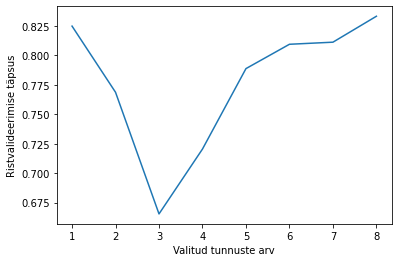

In [18]:

from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

rfecv = RFECV(estimator=rf, step=1, cv=StratifiedKFold(10),
              scoring='accuracy')
rfecv.fit(X_scaled, y_over)

print("Optimaalne tunnuste arv: %d" % rfecv.n_features_)
print(rfecv.ranking_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Valitud tunnuste arv")
plt.ylabel("Ristvalideerimise täpsus")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
poly = PolynomialFeatures()
X_transformed=poly.fit_transform(X_scaled)
print(X_transformed.shape)

(5085, 45)


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
crossvalidation = KFold(n_splits=10, shuffle=True, random_state=1)
gdmA =gdm.drop('GDM', 1)
polyX = pd.DataFrame(X_scaled, columns=gdmA.columns)
print(df.describe())
lr = LogisticRegression(C=0.0018329807108324356, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


baseline = np.mean(cross_val_score(lr, df, y_over, scoring ='roc_auc', cv=crossvalidation, n_jobs=1))
improvements=[baseline]

for feature_A in gdmA.columns:
    polyX[feature_A+'^2'] = polyX[feature_A]**2
    improvements.append(np.mean(cross_val_score(lr, polyX, y_over, scoring='roc_auc', cv=crossvalidation, n_jobs=1)))
    for feature_B in gdmA.columns:
        if feature_A > feature_B:
            polyX[feature_A+'*'+feature_B] = polyX[feature_A] * polyX[feature_B]
            improvements.append(np.mean(cross_val_score(lr, polyX, y_over, scoring='roc_auc', cv=crossvalidation, n_jobs=1)))
            
print (polyX.info())
print ('ROC_AUC %.3f' % abs(np.mean(cross_val_score(lr, polyX, y_over, scoring='roc_auc', cv=crossvalidation, n_jobs=1))))

           DM_sugul         Vanus  ...          PCOS  interaction
count  5.045000e+03  5.045000e+03  ...  5.045000e+03  5045.000000
mean  -8.921176e-16  5.373446e-15  ... -7.194190e-15     0.068542
std    1.000099e+00  1.000099e+00  ...  1.000099e+00     1.170256
min   -3.770377e-01 -2.947749e+00  ... -1.503083e-01    -9.368407
25%   -3.770377e-01 -6.565949e-01  ... -1.503083e-01    -0.068222
50%   -3.770377e-01 -8.380642e-02  ... -1.503083e-01     0.041678
75%   -3.770377e-01  6.799115e-01  ... -1.503083e-01     0.108818
max    2.959869e+00  3.058754e+00  ...  7.911377e+00    20.928318

[8 rows x 9 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 44 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   DM_sugul                        5045 non-null   float64
 1   Vanus                           5045 non-null   float64
 2   sugu                        